In [86]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_ollama import ChatOllama

In [87]:
class AgentState(TypedDict):
    user_input: Annotated[HumanMessage, "Input from the user"]
    agent_response: Annotated[AIMessage, "Response from the agent"]

In [88]:
llm = ChatOllama(model="gemma3:1b", temperature=0.7)

In [89]:
def agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""
    You are a helpful ai assistant. Answer the user question accurate and concisely.
    """)

    response = llm.invoke([system_prompt, state['user_input']])

    state['agent_response'] = response

    return state

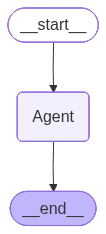

In [90]:
graph = StateGraph(AgentState)

graph.add_node("Agent", agent)

graph.add_edge(START, "Agent")
graph.add_edge("Agent", END)

app = graph.compile()
app

In [91]:
user_input = "hi"

result = app.invoke({
    "user_input": HumanMessage(content=user_input)
})

In [92]:
print(result['agent_response'].content)

Hi there! How can I help you today?
